**this is a template notebook for Assignment 3 on Classification. To get a 60 you will need to complete chapter 1.
    The template is also just an indication. You can add more cells if needed, and can of course delete this line**

# <span style ='background:yellow'>Week 6 Clustering Assignmnet<Title of your notebook></span>


Author: <span style='background:yellow'>Stephen pangga</span><br>
Student number: <span style='background:yellow'>629860</span><br>
Date: <span style='background:yellow'>01-06-2022</span>

For this notebook to work you must have installed the following packages (usually via pip install *packageName*:
* numpy
* pandas
* sklearn
* mathplotlib
* seaborn

From these we will need the following libraries:

In [49]:
# enter here all those 'from .... import ....'
# numpy as np
try:
    import numpy as np
    print('NumPy already installed, only imported')
except:
    %pip install numpy
    import numpy as np
    print('NumPy was not installed, installed and imported')
      
# pyplot as plt
try:
    import matplotlib.pyplot as plt
    print('PyPlot already installed, only imported')
except:
    %pip install matplotlib
    import matplotlib.pyplot as plt
    print('PyPlot was not installed, installed and imported')

# pandas as pd   
try:
    import pandas as pd
    print('pandas already installed, only imported')
except:
    %pip install pandas
    import pandas as pd
    print('pandas was not installed, installed and imported')
    
try:
    import seaborn as sn
    print('seaborn already installed, only imported')
except:
    %pip install seaborn
    import seaborn as sn
    print('seaborn was not installed, installed and imported')

try:
    from sklearn.model_selection import train_test_split
    print('sklearn already installed, only imported')
except:
    %pip install sklearn
    from sklearn.model_selection import train_test_split
    print('sklearn was not installed, installed and imported')
    
from sklearn.cluster import KMeans
%pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import AgglomerativeClustering
%pip install scipy
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
%pip install hdbscan
import hdbscan
from sklearn.preprocessing import StandardScaler

NumPy already installed, only imported
PyPlot already installed, only imported
pandas already installed, only imported
seaborn already installed, only imported
sklearn already installed, only imported
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


# 1. The Soccer Classification

In the Jupyter Notebook from lecture 6 there was one exercise using the k-means clustering, using the Soccer data. In this chapter we'll repeat that and also see how the other models perform with this data.

First we'll need to load the data itself.

In [50]:
# enter code to load the Soccer2019C.csv file
data = pd.read_csv('Soccer2019C.csv')
data.dropna()
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94,27,24,33,9,9,15,15,11,€228.1M
1,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96,33,28,26,6,11,15,14,8,€226.5M
2,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88,68,58,51,15,13,5,10,13,€196.4M
3,5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,...,91,34,27,22,11,12,6,8,8,€172.1M
4,15,211110,P. Dybala,24,https://cdn.sofifa.org/players/4/19/211110.png,Argentina,https://cdn.sofifa.org/flags/52.png,89,94,Juventus,...,84,23,20,20,5,4,4,5,8,€153.5M


We were interested to find any classes in 'Finishing' and 'HeadingAccuracy'. So lets select those from the data.

In [51]:
# enter code to select the two variables, make sure to also remove the missing values.
soccer_df = data[["Finishing","HeadingAccuracy"]]
soccer_df.head()

,Finishing,HeadingAccuracy
0,87,62
1,95,70
2,82,55
3,84,61
4,84,68


A visual might be nice, so lets show the scatterplot of these two:

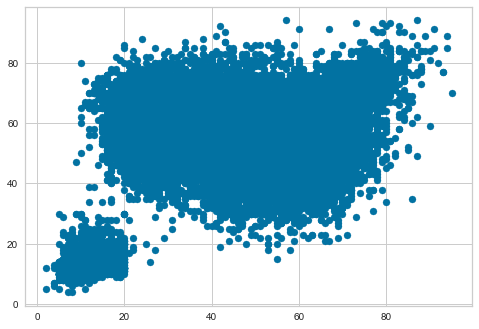

In [52]:
# code to create the scatterplot
plt.scatter(soccer_df["Finishing"], soccer_df["HeadingAccuracy"])

**<span style='background:yellow'>\<describe what you see, how many clusters would we expect?></span>**

Looking at the scatter plot, there seem to be two clusters that can be clearly seen. The two cluster shows the players data regarding their finishing and head accuracy.

Now that we have the data, lets begin with the classification.

# 1.1. K-Means

The first, and probably most famous, technique discussed was the k-means. 

**<span style='background:yellow'>\<explain how k-means technique works in your own words></span>**. 

K-means represent the amount of centroid that consist within the data. 
This clustering algorithm pattern makes a group of similar data points with recognizable pattern and show that pattern of concentrated data points that have similar characteristics. Usually when a graph is presented, we can already visualize how many cluster there is for that dataset. Using the predicted amount, we cam define the amount of centroid from the data set. Then we can differentiate the cluster using the algoritm to allocate the data points from their nearest cluster.


We think there are two clusters, so lets first use that and set the k-means model using k=2. We'll use Elkan's algorithm, rather than full just to speed things along.

In [53]:
# code to create and fit the k-means model (with elkan and full) 
Kmeans_elkans = KMeans(init='random', algorithm='elkan', n_clusters=2,random_state=0)
Kmeans_elkans.fit(soccer_df)

KMeans(algorithm='elkan', init='random', n_clusters=2, random_state=0)

Great, now lets see the result...

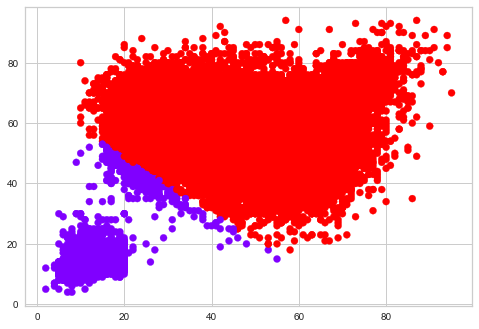

In [54]:
# code to create scatterplot with the classification
plt.scatter(soccer_df["Finishing"], soccer_df["HeadingAccuracy"], c=Kmeans_elkans.labels_, cmap='rainbow')

**<span style='background:yellow'>\<describe the result, is it what you'd hoped for? Explain why this might be (think of how k-means works)></span>**


The result has shown a scatterplot that shows 2 cluster, as what we predicted earlier on. Before we can only see one color, now we have a better of the seperation of clusters with red and purple. The representation of different colours has shown the k mean algorithm where the a random centroids of the cluster is selected, as a beginning point of the data's and based on that the model repeats calculation the point mean connection and group them.

Perhaps another initialization method works better. K-means++ is quite popular. 

**<span style='background:yellow'>\<explain briefly how k-means++ is different from k-means in your own words></span>**.

K-means and K-means++ are clustering methods that are used in unsupervised learning. Even though K-means and Kmeans++ are pretty similar algorithm and Kmeans++ being the faster and improved version. Kmeans++ is better due to its initial selection of center points for the clusters and the quality of its clustering.

Lets see:

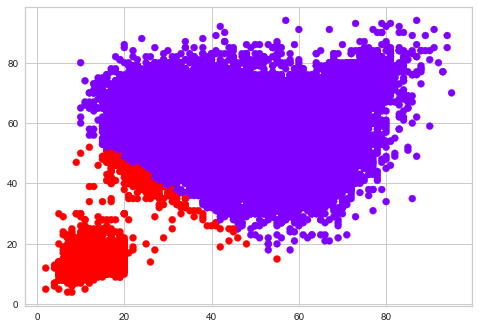

In [55]:
# code to create and fit the k-means++ (elkan) and also show the scatterplot
kmeans = KMeans(init='k-means++',algorithm='elkan', n_clusters=2, random_state=0)
kmeans.fit(soccer_df)
plt.scatter(soccer_df["Finishing"], soccer_df["HeadingAccuracy"], c=kmeans.labels_, cmap='rainbow')


**<span style='background:yellow'>\<describe the result, is it what you'd hoped for?></span>**

The result of Kmeans++ has no difference with the result of Kmeans. This is expected knowing that K-means++ is just a better version of K-means when it comes to initialization of the center point of the cluster.

Perhaps the k=2 is wrong. We could try to iterate over different values of k and measure the performance with a few different metrics.

We'll use the same function as in the Jupyter Notebook from the lecture:

In [56]:
# copy the elbowPlot function, and if you like you can adjust it.
def elbowPlot(data, model, kRange):
    
    # set the plotting stage for later
    fig, (ax1, ax2, ax3) = plt.subplots(1,3, constrained_layout=True,figsize=(15,5))

    # Using the Distortion measure:
    visualizer = KElbowVisualizer(model, k=kRange, metric='distortion', ax=ax1)
    chPlot=visualizer.fit(data)
    ax1.set_title('Distortion')

    # Using the Calinski-Harabasz measure
    visualizer = KElbowVisualizer(model, k=kRange, metric='calinski_harabasz', ax=ax2)
    chPlot=visualizer.fit(data)
    ax2.set_title('Calinski-Harabasz')

    # Using the Silhouette measure
    visualizer = KElbowVisualizer(model, k=kRange, metric='silhouette', ax=ax3)
    chPlot=visualizer.fit(data)
    ax3.set_title('Silhouette')

    # Show the results
    plt.show()

Now lets see what this gives for our Soccer data:

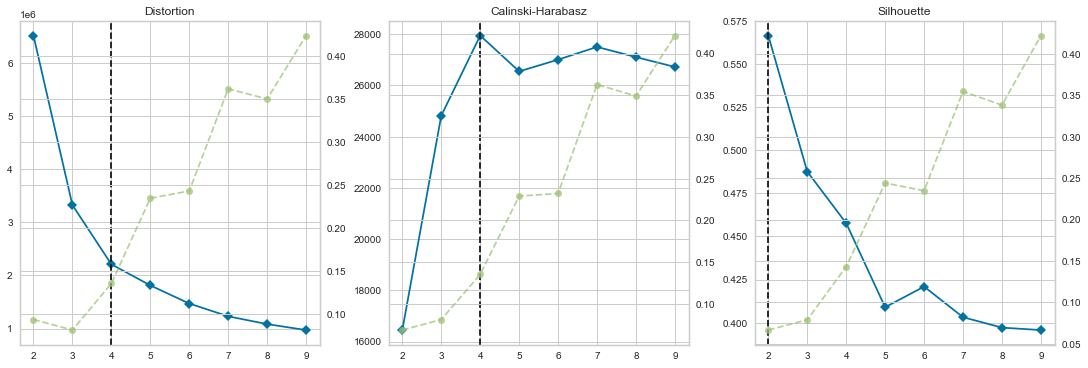

In [57]:
# code to show the three elbow plots (this might take a little time)
elbowPlot(soccer_df, kmeans, (2,10))

**<span style='background:yellow'>\<Explain the results: which k is recommended AND what does 'Distortion', 'Calinski-Harabasz', and 'Silhouette' actually measure (briefly explain the difference in your own words></span>** 

Looking at the 3 graphs, Silhouette has the k-value of 2 and Distortion & Calinski-harabasz have the k-value of 4 and seems to be more favorable than k value of 2 as it shown twice.

The graph shows 3 different elbow plot which shows K-value.

* Distortion - Calculates the sum of squared distance of each point from their assigned center. 

* Calinski-harabasz - Calculates the sum of the cluster dispersion and inter-cluster dispersion for all the cluster to give a score to create a better performance.

* Silhouette - Calculates the average Silhoutte Coefficient. This is defined for each of the data and shows the how similar the data's within their own clusters are.

Lets see what happens if we use the recommended k value:

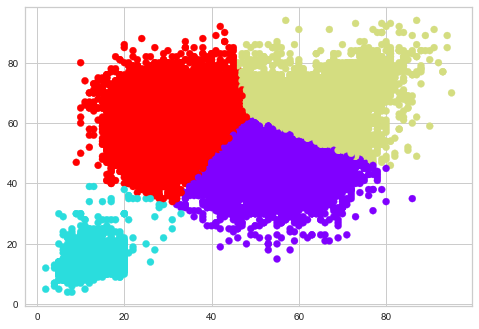

In [58]:
# code to create and fit the k-means++ (full) and also show the scatterplot with the k value from the elbow plot
kmeans = KMeans(init='k-means++',algorithm='full', n_clusters=4, random_state=0)
kmeans.fit(soccer_df)
plt.scatter(soccer_df["Finishing"], soccer_df["HeadingAccuracy"], c=kmeans.labels_, cmap='rainbow')

**<span style='background:yellow'>\<describe the result, is it what you'd hoped for?></span>**

The result make sense, as we now have provided a k-value of 4. We now see more divided clusters and can be seen as accurate compare to the previous k-value of 2.

Now lets see if another technique might do better (or worse).

## 1.2. Hierarchical Clustering Analysis (HCA)

The second technique discussed was the Hierarchical Clustering Analysis (HCA). 

**<span style='background:yellow'>\<explain how this technique works in your own words></span>**.


Hierachical Clustering analysis, is an algorithm that groups the same object into groups of clusters which has the pattern from top to bottom. This analysis repeatedly calculates the distance of each object and between each clusters. Once the cluster is grouped, the outcome can be used to graphically make a dendogram to show the hierachical relationship between objects.

There are 2 types of techniques:
* Agglomerative Hierarchical clustering: this is a 'buttom up approach'. This clustering techniques starts with a small clusters and then merges with another cluster that is nearby forming bigger cluster as it goes to the levels of the hierarchy and reaching one single cluster.


* Divisive Hierarchical clustering  this is a 'top down' which is the opposite of Agglomerative Hierarchical clustering. This clustering techniques starts with a big cluster which consist of all the data points and is assigned to one single cluster, which later on splits into their own set of small clusters creating a hierarchy connection which can then be shown in the dendogram their parental cluster.


One selection to be made is the so-called 'linkage'. The four basic ones are 'single', 'complete', 'mean', and 'ward'.

**<span style='background:yellow'>\<give a brief description of each of these linkage options></span>**


* Single: The distance between the clusters is the minimum distance between the members of the clusters.
* Complete: The distance between the clusters is the maximum distance betweem the members of the clusters.
* Mean: The distance between each pair of within the differents clusters are added up and divided by the number of pairs, to get an average distance between the different clusters.
* Ward: This method calculates the squared distance similarities between the different clusters.



In the Jupyter Notebook from the lecture there was a function that can compare these four options in one go. Lets use that here as well.

In [59]:
# copy the compareLinkage function, and if you like you can adjust it.
def compareLinkage(myData, k):
    hca, axs = plt.subplots(2,2, constrained_layout=True)

    hierClust = AgglomerativeClustering(linkage='single', n_clusters=k)
    hierClust.fit(myData)
    axs[0,0].scatter(myData[:,0],myData[:,1], c=hierClust.labels_, cmap='rainbow')
    axs[0,0].set_title('Single')

    hierClust = AgglomerativeClustering(linkage='average', n_clusters=k)
    hierClust.fit(myData)
    axs[0,1].scatter(myData[:,0],myData[:,1], c=hierClust.labels_, cmap='rainbow')
    axs[0,1].set_title('Average')

    hierClust = AgglomerativeClustering(linkage='complete', n_clusters=k)
    hierClust.fit(myData)
    axs[1,0].scatter(myData[:,0],myData[:,1], c=hierClust.labels_, cmap='rainbow')
    axs[1,0].set_title('Complete')

    hierClust = AgglomerativeClustering(linkage='ward', n_clusters=k)
    hierClust.fit(myData)
    axs[1,1].scatter(myData[:,0],myData[:,1], c=hierClust.labels_, cmap='rainbow')
    axs[1,1].set_title('Ward')

    plt.show()

Now lets use it on the Soccer data. We assumed there to be 2 clusters, so we'll stick with our k = 2 for now.

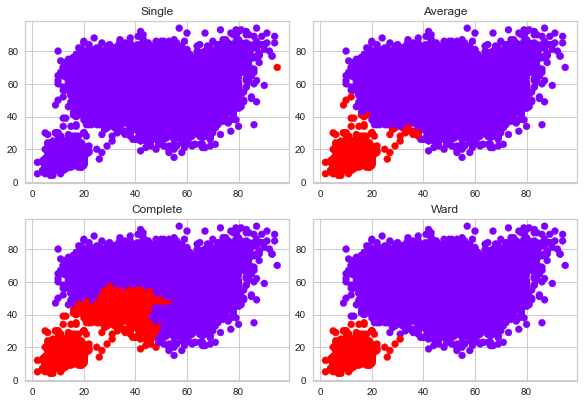

In [60]:
# code to create the four HCA linkage models and scatterplot (use the function)
compareLinkage(np.asarray(soccer_df), 2)

**<span style='background:yellow'>\<what do you notice? Are they all the same? What might cause the differences?></span>**


Looking at the results, the 4 different linkages show different clusters with some quite similarities except for one algorithm the single linkage. Average, Complete & Ward show 2 strong different clusters and for Single there seems to be 1 cluster with 1 different data point. For each of the linkage, the clusters are different:
* Single - there is 1 giant cluster and a point. The is due to the distance of the points and the density of the data seems to show that there is 1 big cluster.
* Average - in this case, the average takes the pair of points and checks the similarities and calculates the average of it.
* Complete - there are 2 clusters and the red clusters seem to take some of the purple clusters.
* Ward - shows a strong difference between the clusters as there is a strong seperation between the clusters.

Would the k = 2 perhaps again be different? Lets find out. We can use our 'elbowPlot' function here as well.

single


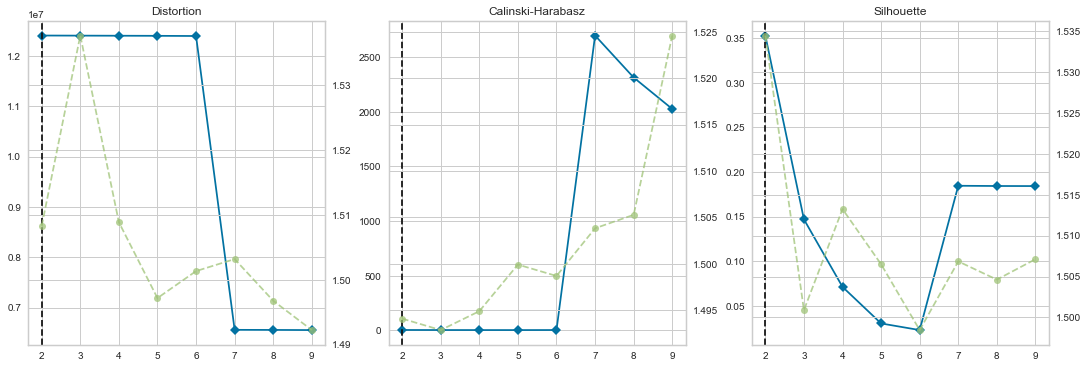

In [61]:
# code to run the elbowPlot four times (ones for each different linkage) (this might take quite some time)
# print something between so you know which output belongs to which linkage
print('single')
hier_single = AgglomerativeClustering(linkage='single', n_clusters=2)
elbowPlot(soccer_df, hier_single, (2,10))

Average


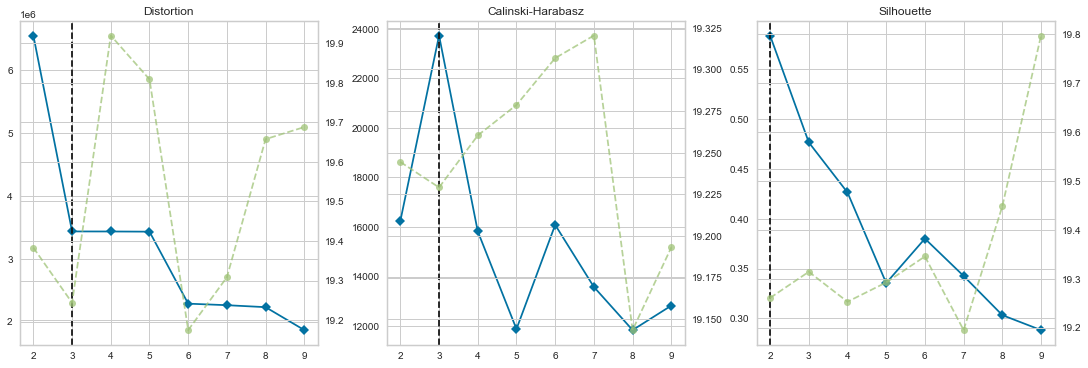

In [62]:
print('Average')
hier_average = AgglomerativeClustering(linkage='average', n_clusters=2)
elbowPlot(soccer_df, hier_average, (2,10))

In [63]:
print('complete')
hier_complete = AgglomerativeClustering(linkage='complete', n_clusters=2)
elbowPlot(soccer_df, hier_complete, (2,10))

complete


ward


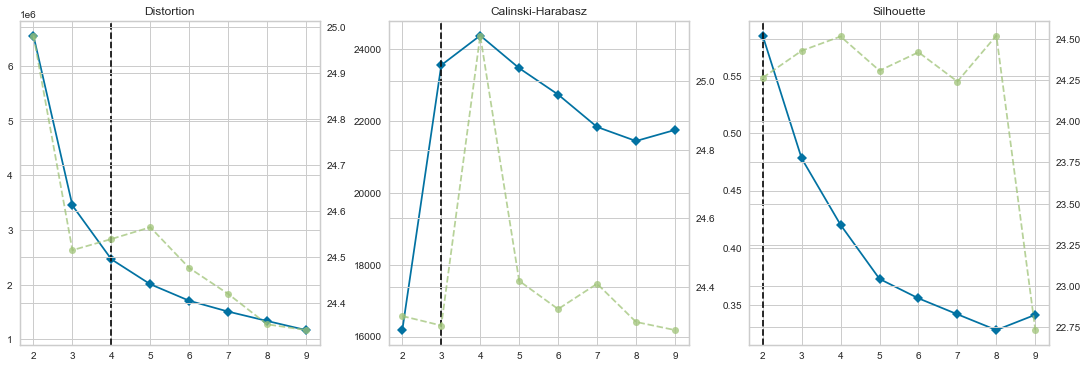

In [ ]:
print('ward')
hier_ward = AgglomerativeClustering(linkage='ward', n_clusters=2)
elbowPlot(soccer_df, hier_ward, (2,10))

**<span style='background:yellow'>\<are there any other suggestions for k than 2? What seems to be the most common suggestion (the modal suggestion)?></span>**


The different linkage elbow graph show different k value not only 2. The different linkage has this k values:
* Single: k = 2 for all the graphs
* Average: k has the values of 3,3 & 2
* Complete: k has the values of 5,3 & 3
* Ward: k has the values of 4,3 & 2

so, there is more suggestion for the values of k, 2,3,4 & 5 and the most suggested is 2 & 3 which is suggested 5 times.

A few different k-s are suggested by the elbow plot. Lets see how our HCA performs if we use those.

k=2


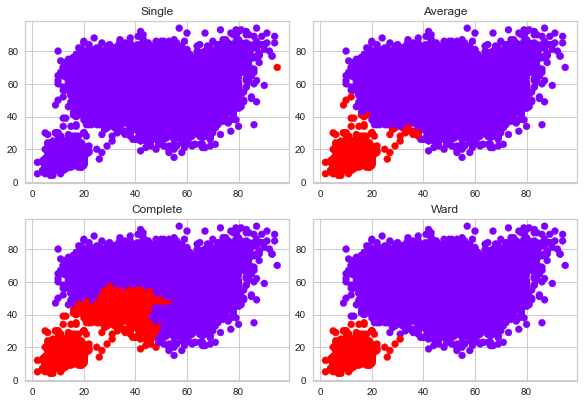

In [ ]:
# code to show the four linkages for the different suggested k's from the elbow plots.
print('k=2')
compareLinkage(np.asarray(soccer_df), 2)

k=3


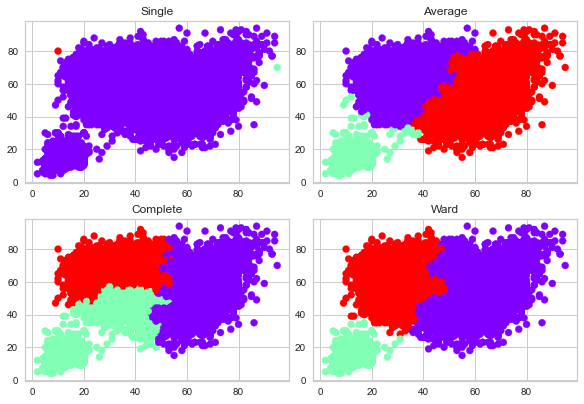

In [ ]:
print('k=3')
compareLinkage(np.asarray(soccer_df), 3)

k=4


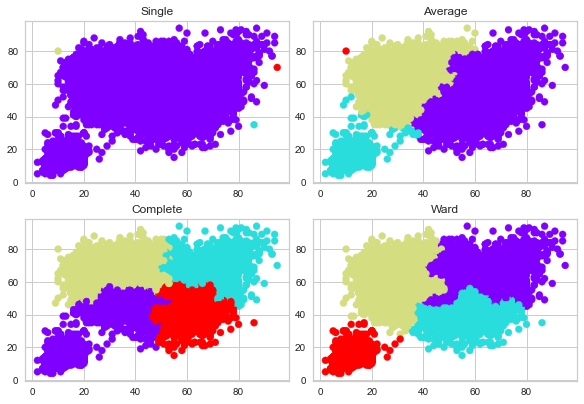

In [ ]:
print('k=4')
compareLinkage(np.asarray(soccer_df), 4)

k=5


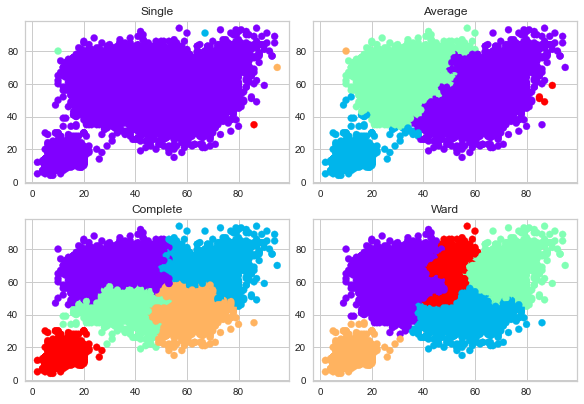

In [ ]:
print('k=5')
compareLinkage(np.asarray(soccer_df), 5)

**<span style='background:yellow'>\<what can be concluded from the result? how did HCA compare to our k-means></span>**


The result shows the four recommended k value of 2,3,4 & 5.
The scatter plot show all the different cluster using the K-values which show the difference between the cluster for each k value.
In the single linkage there is 1 strong cluster with 4 different colored data points. 
While the other linkage show more strong clusters with the datasets.
Comparing the HCA result, it seems like there is a different distribution of data compared to k-means.

The dendrogram is also often used. Lets at least produce it once.

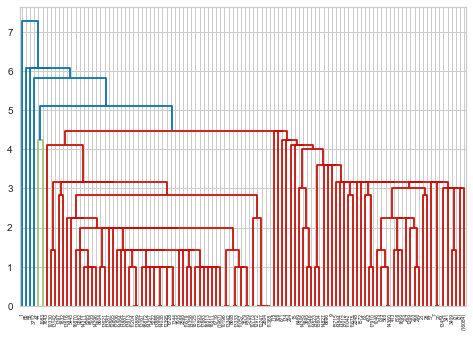

In [ ]:
# code to show at least one dendrogram. (if your kernel crashes on this, show a dendrogram of a selected portion of the data)

Z = linkage(soccer_df, method='single')
dendrogram(Z, p=30, truncate_mode='level')
plt.show()

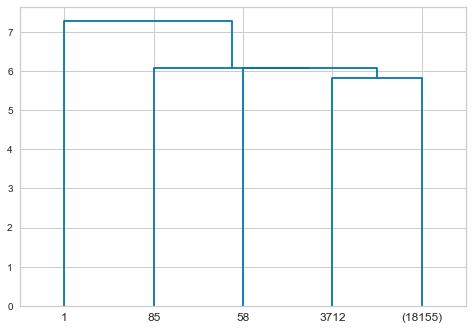

In [ ]:
# if dendrogram is too large, code to zoom in.
dendrogram(Z, p=3, truncate_mode='level')
plt.show()

Allright, two techniques down, lets move on to the third...

## 1.3. DBSCAN

The third technique discussed was the Density Based Spatial Clustering of Applications with Noise (DBSCAN).

**<span style='background:yellow'>\<explain how this technique works in your own words></span>**.



DBSCAN is a technique that looks at the cluster within the data points that contains possible noise and outliers data.
The algorithm picks up a point within the clusters of datas and picks different data points within the range of the provided epsilon value.


The idea is to group data points together that are close to each other given the size of the radius of the circle. the data points within the circle of that selected data point can then produce their own cluster. The datas outside that circle is then consider to be an outlier or a noise.

This algoritm use two parameters:
* minPoints(ns as used in the code below) is the minimum amount of data points that will be clustered
* epsilon is the radius of the circle that will locate the datapoints for the cluster



This method will require two input parameters. The epsilon and the min number of samples.

As the min number of samples I have chosen for **<span style='background:yellow'> 60</span>**.

For the epsilon we can create a visual aid using the nearest neighbors.

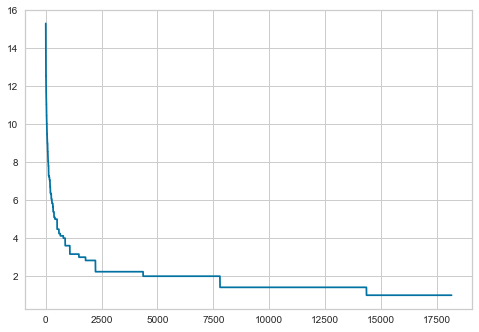

In [ ]:
# code to show the nearest neighbors plot with different distances


ns=60 # the minimum number of neighbors
nbrs = NearestNeighbors(n_neighbors=ns).fit(soccer_df)
distances, indices = nbrs.kneighbors(soccer_df)
distanceDec = sorted(distances[:,ns-1], reverse=True)
plt.plot(list(range(1,soccer_df.shape[0]+1)), distanceDec);


**<span style='background:yellow'>\<interpret the result, what would be a good epsilon?></span>**

Looking at the graph of N-neighbors vs distance, it looks like 7.5 is a good epsilon as the line starts to curve which can be a good parameters values to use to create our DBSCAN model.

Now that we have a min number of points for a neighborhood, and an epsilon we can run the DBSCAN.

In [ ]:
# code to create and fit the DBSCAN model.
dbscan = DBSCAN(eps=7.5,min_samples=60)
dbscan.fit(soccer_df)

DBSCAN(eps=7.5, min_samples=60)

Lets look at the results:

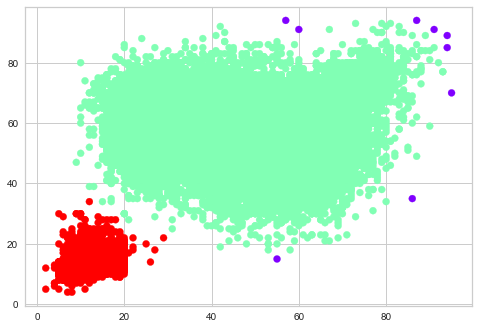

In [ ]:
# code to show the scatterplot with the clusters
plt.scatter(soccer_df["Finishing"], soccer_df["HeadingAccuracy"], c=dbscan.labels_, cmap='rainbow');


**<span style='background:yellow'>\<describe the result, how does it compare to the other models, what might cause this></span>**

The plot shows 2 distinct clusters, as what we have seen before when K value is 2. You can see the red cluster and green cluster although there seems to be points that are not in the clusters, which i think might be outliers from the dataset. 
However, some of the purple points can be found in the single linkage when the k value is 5.


There was one more technique discussed, the almost perfect HDBSCAN...

## 1.4. HDBSCAN

The fourth technique was the Hierachical Density Based Spatial Clustering of Applications with Noise (HDBSCAN).

**<span style='background:yellow'>\<explain how this technique is different from DBSCAN in your own words></span>**.

HDBSCAN is a better version of DBSCAN because it only needs one input parameter, the minimum cluster size. As HDBSCAN make use of multiple epsilon values by itself.
The algorithm finds the distribution of the data where we can see the overall pattern of the data from the datasets. This patterns can be represented by shape, how the data is spread out and show the outliers. Based on the shape and spread out of data we can find the dense region, where the data are close to each other and more intensive than the rest. Now that we know where are the data that is more intensive and dense, we can create a circle at that area to show the data points that will fit the cluster of similar data points. 
Since the algorithm use multiple epsilon, it produces different hierarchy which shows the relationships between the clusters.

Minimum spanning tree is the smallest possible sum of the distance between all the possible data points.

Dendrogram is about making different branches of relationship between data objects that have similarity. Where the main branch can be split into different levels and then one of the lower branch can be further splinted into different branches.

Condensed tree visualize the hierarchy and shows the different cluster in a tree showing how the cluster is being separated and the amount per cluster at the specific layer level.



One big advantage of this technique is that it only requires one input parameter: the min samples. We can use the same as from DBSCAN. So lets dive right in.

In [ ]:
# code to create and fit the HDBSCAN model.

hdbscanModel = hdbscan.HDBSCAN(min_cluster_size=60, gen_min_span_tree=True)
hdbscanModel.fit(soccer_df)

HDBSCAN(gen_min_span_tree=True, min_cluster_size=60)

And the result....

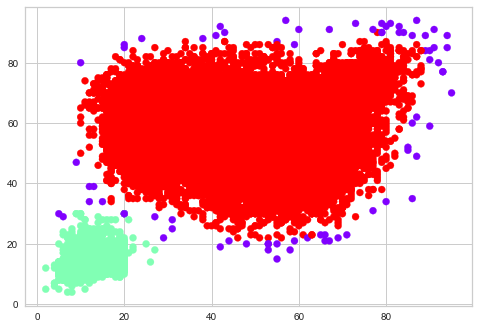

In [ ]:
# code to show the scatterplot with the clusters
plt.scatter(soccer_df["Finishing"], soccer_df["HeadingAccuracy"], c=hdbscanModel.labels_, cmap='rainbow');


**<span style='background:yellow'>\<describe the result, how does it compare to the other models></span>**


The HDBSCAN result looks quite familiar with the result of DBSCAN, although the 2 algorithm have the same amount of clusters.

HDBSCAN seems to be a little more accurate, it has shown 2 clusters but around the clusters there seems to be a different color which can be the outliers that we have seen before from DBSCAN but more.

The HDBSCAN actually goes through a few steps: The minimum spanning tree => the dendrogram => the condensed tree.

In the Jupyter Notebook from the lecture, a small function was made to show these. 

In [ ]:
# code of the HDBSCANvisuals function, adjust if needed/wanted/improvements.
def HDBSCANvisuals():
    # set the plotting stage for later
    plt.figure(figsize=(10,3))

    plt.subplot(131)
    plt.gca().set_title('Min. Spanning Tree')
    hdbscanModel.minimum_spanning_tree_.plot(edge_cmap='viridis', edge_alpha=0.6, node_size=80,edge_linewidth=2)

    plt.subplot(132)
    plt.gca().set_title('Dendrogram')
    hdbscanModel.single_linkage_tree_.plot(cmap='viridis', colorbar=True)

    plt.subplot(133)
    plt.gca().set_title('Condensed Tree')
    hdbscanModel.condensed_tree_.plot(select_clusters=True, selection_palette=sn.color_palette())

    # Show the results
    plt.show()

So for those who like to see what is going on in these stages:

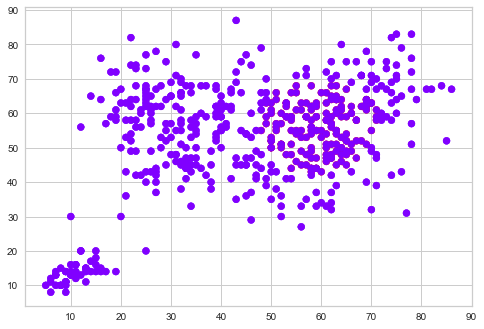

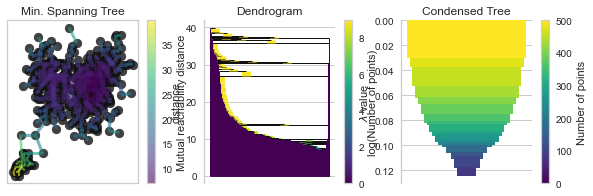

In [ ]:
# code using the function to show the three visuals. 
# Note if your kernel crashes with this, you can use a sample set from the data.

#the kernel crash, soo i made a new dataframe with 500 lines of data.
sample = soccer_df.sample(n = 500, random_state = 1)
# sample.head()

dbscan_sample = DBSCAN(eps=8, min_samples=60)
dbscan.fit(sample)
plt.scatter(sample["Finishing"], sample["HeadingAccuracy"], c=dbscan.labels_, cmap='rainbow');

hdbscanModel = hdbscan.HDBSCAN(min_cluster_size=60, gen_min_span_tree=True)
hdbscanModel.fit(sample)
plt.scatter(sample["Finishing"], sample["HeadingAccuracy"], c=hdbscanModel.labels_, cmap='rainbow');

HDBSCANvisuals()


## 1.5. Adjusting the Data

We used the unadjusted data, but often a normalization is used. What would the results have been, if we had first normalized our scores using the StandardScaler.

Lets find out.

First transform the data:

In [ ]:
# code using the StandardScaler to transform the data.

scaler = StandardScaler()
scaler.fit(soccer_df)

soccer_df_SC = scaler.transform(soccer_df)

Now lets see all the results again, but using this scaled data.

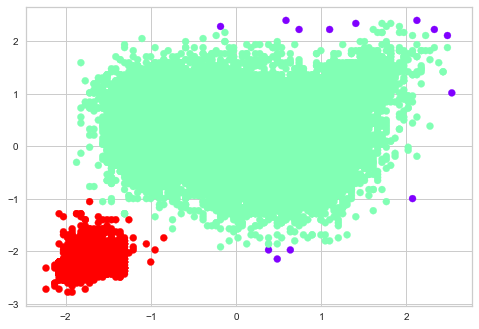

In [ ]:
# long code cell with all the different models using the scaled data. Output should each time be the scatterplot.
# you could add some other cells first to find perhaps some parameters.
dbscan = DBSCAN(eps=0.4,min_samples=60)
dbscan.fit(soccer_df_SC)
plt.scatter(soccer_df_SC[:,0], soccer_df_SC[:,1], c=dbscan.labels_, cmap='rainbow');


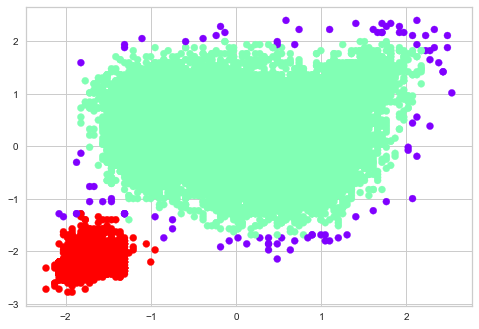

In [ ]:
hdbscanModel = hdbscan.HDBSCAN(min_cluster_size=60, gen_min_span_tree=True)
hdbscanModel.fit(soccer_df_SC)
plt.scatter(soccer_df_SC[:,0], soccer_df_SC[:,1], c=hdbscanModel.labels_, cmap='rainbow');

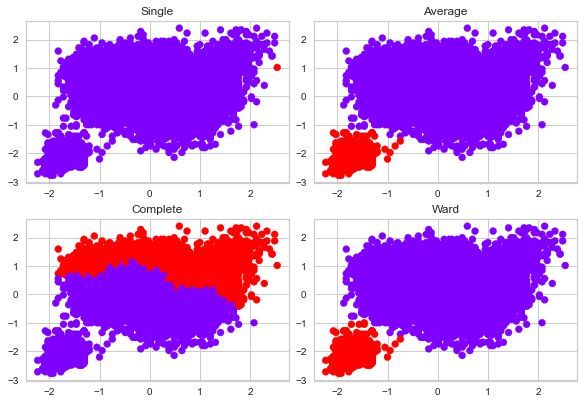

In [ ]:
compareLinkage(soccer_df_SC, 2)

kmeans


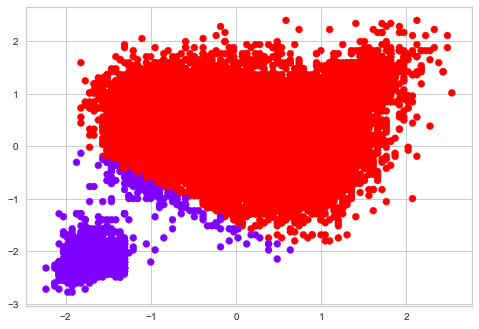

In [ ]:
print('kmeans')

Kmeans_elkans = KMeans(init='random', algorithm='elkan', n_clusters=2,random_state=0)
Kmeans_elkans.fit(soccer_df_SC)

plt.scatter(soccer_df_SC[:,0], soccer_df_SC[:,1], c=Kmeans_elkans.labels_, cmap='rainbow')

# plt.scatter(soccer_df_SC["Finishing"], soccer_df_SC["HeadingAccuracy"], c=Kmeans_elkans.labels_, cmap='rainbow')

kmeans


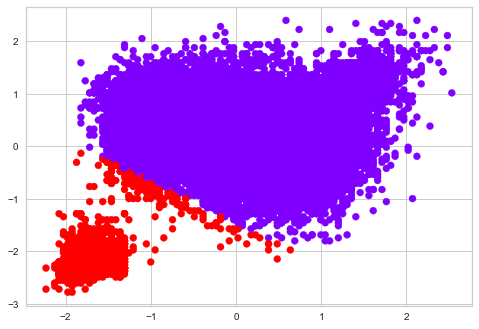

In [ ]:
print('kmeans')

Kmeans_elkans = KMeans(init='k-means++', algorithm='elkan', n_clusters=2,random_state=0)
Kmeans_elkans.fit(soccer_df_SC)
plt.scatter(soccer_df_SC[:,0], soccer_df_SC[:,1], c=Kmeans_elkans.labels_, cmap='rainbow')

# plt.scatter(soccer_df_SC["Finishing"], soccer_df_SC["HeadingAccuracy"], c=Kmeans_elkans.labels_, cmap='rainbow')

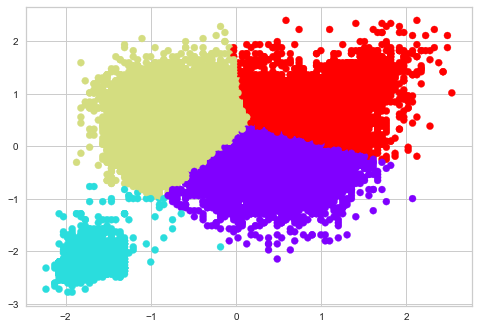

In [ ]:
kmeans = KMeans(init='k-means++',algorithm='full', n_clusters=4, random_state=0)
kmeans.fit(soccer_df_SC)
plt.scatter(soccer_df_SC[:,0], soccer_df_SC[:,1], c=kmeans.labels_, cmap='rainbow')

# plt.scatter(soccer_df["Finishing"], soccer_df["HeadingAccuracy"], c=kmeans.labels_, cmap='rainbow')

**<span style='background:yellow'>\<how do the results compare when using the unadjusted data?></span>**

The scatterplots are produce using the transformed data.
The kmeans and kmeans++ seems to be the same as shown before at chapter 1.1.
The DBSCAN  and the transformed data DBSCAN almost have the same result, with just a little different with the outliers.
The HDBSCAN and tranformed data HDBSCAN are almost have the same result, but i can see some extra outliers have been shown with the transformed data result.
Single linkage are the same as before.
Average and Ward linkage have almost the same clusters with some extra data points.
The complete linkage has shown the biggest change as the tranformed data has shown that the clusters flipped and purple has more data points than the other cluster.

<font size="5"><center>-----Chapters 1 is required to be fully completed to get a 60, the next few chapters will give a +10 for each chapter.<br> 
    However the template for those chapters is not as extensive as the previous chapters. <br>
    You can select any chapter below the order is not fixed (you can leave the others empty)<br>
    You don't have to use the same dataset for the chapters below. If it helps in clarification you can use another dataset, but then make sure to include it as you submit.
    ----</center></font>

# 2. Improved Visualisation

The basic scatterplot can become a big blur, especially when you have a lot of datapoints.

*note: you can also use the clusterable_data.npy or another dataset, but it has to be one with a LOT of datapoints*

In [ ]:
# code to load dataset if not already loaded


If we create a scatterplot of **<span style='background:yellow'>\<your first choosen variable></span>** and **<span style='background:yellow'>\<your second choosen variable></span>**

In [ ]:
# code to create the basic scatterplot


It looks like a big blur.

One technique to overcome this, is to use opacity. See for an example: https://i2.wp.com/cmdlinetips.com/wp-content/uploads/2019/04/Scatter_Plot_transparent_with_log_scale_Seaborn_Python.jpeg

Here's a function that can create the scatterplot like this, for a given model and dataset.

In [ ]:
# code of a function that takes the data as input and shows the scatterplot with the opacity. The level of opacity can also be a parameter.


Here's an example of using the function:

In [ ]:
# code using the function to show the scatterplot with opacity.


Another method to deal with even larger datasets is a heatmap. An example is shown below.

![image heatmap](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRvQZGu7SMVBCh6KIcF7toUqRpak2qWwQNkkhpZzv30hFbwYdDk&usqp=CAU)

This usually requires a Gaussian kernel, and is often slower than the previous methods.

So lets create a function for this as well.

In [ ]:
# code of a function that takes the data as input and shows the scatterplot as a heatmap. The color scaling could be an optional parameter.


Here's an example of using the function:

In [ ]:
# code using the function to show the heatmap.


# 3. A New Technique

In the Jupyter Notebook from the lecture, we discussed quite a few techniques:

* k-means (with Lloyd and Elkan)
* k-means++ (with Lloyd and Elkan)
* HCA Single linkage
* HCA Complete linkage
* HCA Mean linkage
* HCA Ward linkage
* DBSCAN
* HDBSCAN*

In the appendix there was also:

* Affinity Propagation
* Spectral Clustering
* Mini-batch K-means
* k-medoids
* HCA Centroid linkage
* HCA Median linkage
* Mean Shift
* OPTICS

However, as shown on the slides (near the end) there are a lot more. 

In this chapter the **<span style='background:yellow'>\<your chosen technique that is not listed above></span>** is discussed.

**<span style='background:yellow'>\<explain this new technique in detail. What does it do? How does it in principal work? How is it compared to the other techniques discussed? You probably need a few cells for this></span>**

In [ ]:
# code to create and fit the model (perhaps another dataset is also required?)

In [ ]:
# code to show the result

# 4. Categorical Data

As with the clustering, the categorical data is a special case. In this chapter we'll describe one way to cluster using categorical data.

**<span style='background:yellow'>\<explain this new technique in detail. What does it do? How does it in principal work? You probably need a few cells for this></span>**

In [ ]:
# code to create and fit the model (perhaps another dataset is also required?)


In [ ]:
# code to show the result in a scatterplot with the clusters.


# 5. Elbow as a Number
The elbowPlot gives a nice visual tool. But I'd like to have the resulting k-value as a number, so I can use it as an input parameter for some loops over different models.

I couldn't find a method to extract the result from the KElbowVisualizer. So we'll have to create something ourselves. Perhaps 'from kneed import KneeLocator' can help here...

Below is a function that will find the knee/elbow point for each of the three metrics, and returns the results as an array.

In [ ]:
# code for the above described function


In [ ]:
# code as example to use the function


## APA Reference
#### K-means explanation:

Garbade, M. J. (2022, May 17). Understanding K-means Clustering in Machine Learning. Medium. Retrieved June 04, 2022, from https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1

#### Distortion explanation:

GeeksforGeeks. (2022, May 18). Elbow Method for optimal value of k in KMeans. Retrieved June 04, 2022, from https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/


#### Silhoute Calinski-Harabasz source:

Wei, H. (2021, December 13). How to measure clustering performances when there are no ground truth? Medium. Retrieved June 05, 2022, from https://medium.com/@haataa/how-to-measure-clustering-performances-when-there-are-no-ground-truth-db027e9a871c


#### HCA explanation

Chauhan, N. S. (2019, September 27). What is Hierarchical Clustering? KDnuggets. Retrieved June 7, 2022, from https://www.kdnuggets.com/2019/09/hierarchical-clustering.html

#### Different linkage explained

The Institute for Statistics Education at Statistics.com. (2013, December 12). Linkage Function. Statistics.Com: Data Science, Analytics & Statistics Courses. Retrieved June 7, 2022, from https://www.statistics.com/glossary/linkage-function/


#### DBSCAN

Chauhan, N. S. (2022, April 4). DBSCAN Clustering Algorithm in Machine Learning. KDnuggets. Retrieved June 7, 2022, from https://www.kdnuggets.com/2020/04/dbscan-clustering-algorithm-machine-learning.html

#### HDBSCAN

Berba, P. (2020, January 17). Understanding HDBSCAN and Density-Based Clustering. Pepe Berba. Retrieved June 10, 2022, from https://pberba.github.io/stats/2020/01/17/hdbscan/


McInnes, L., Healy, J., & Astels, S. T. E. V. E. (n.d.). Getting More Information About a Clustering — hdbscan 0.8.1 documentation. Hdbscan. Retrieved June 22, 2022, from https://hdbscan.readthedocs.io/en/latest/advanced_hdbscan.html#condensed-trees

programiz. (n.d.). Spanning Tree and Minimum Spanning Tree. Retrieved June 22, 2022, from https://www.programiz.com/dsa/spanning-tree-and-minimum-spanning-tree




